In [1]:
import numpy as np # Numpy(넘파이) 패키지 임포트
import pandas as pd #pandas(판다스) 패키지 임포트
import seaborn as sns #Seaborn(씨본) 패키지 임포트
import matplotlib.pyplot as plt # 맷플롯립 import 하기
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [65]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [66]:
df.loc[df['smoker'] == 'no', 'smoker'] = 0
df.loc[df['smoker'] == 'yes', 'smoker'] = 1
df = df.astype({'smoker' : int})
df['bmi'] = df['bmi']
df['age'] = df['age']
df.drop(['sex', 'children', 'region'], axis=1, inplace=True)
df = df.loc[(df['charges'] <= 15000) & (df['smoker'] == 0) | (df['smoker'] == 1)]
df_0 = df.loc[df['smoker'] == 0]
df_1 = df.loc[df['smoker'] == 1]
df

,age,bmi,smoker,charges
0,19,27.90,1,16884.9240
1,18,33.77,0,1725.5523
2,28,33.00,0,4449.4620
4,32,28.88,0,3866.8552
5,31,25.74,0,3756.6216
...,...,...,...,...
1333,50,30.97,0,10600.5483
1334,18,31.92,0,2205.9808
1335,18,36.85,0,1629.8335
1336,21,25.80,0,2007.9450


In [11]:
df_1

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
11,62,26.290,1,27808.72510
14,27,42.130,1,39611.75770
19,30,35.300,1,36837.46700
23,34,31.920,1,37701.87680
...,...,...,...,...
1313,19,34.700,1,36397.57600
1314,30,23.655,1,18765.87545
1321,62,26.695,1,28101.33305
1323,42,40.370,1,43896.37630


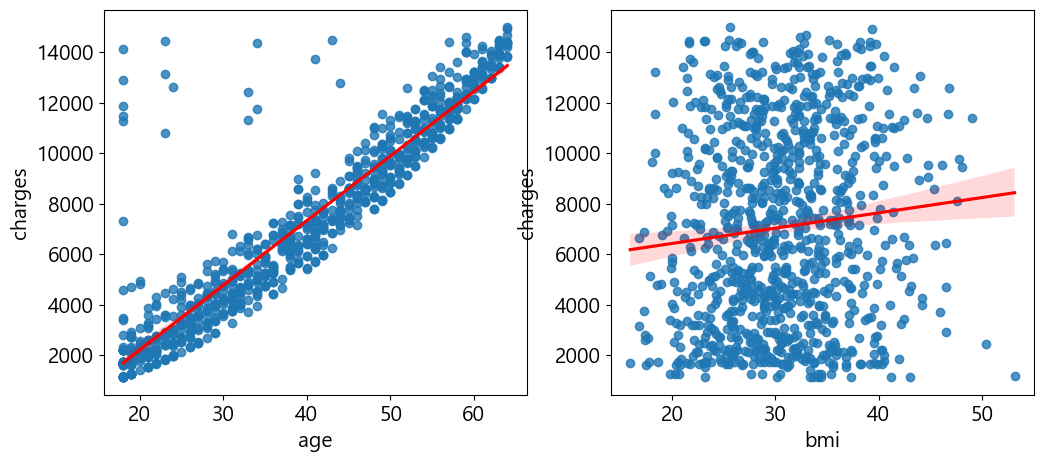

In [67]:
fig, (ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.regplot(x='age',y='charges',data = df_0,ax=ax1, line_kws={"color": "red"})
sns.regplot(x='bmi',y='charges',data = df_0,ax=ax2, line_kws={"color": "red"})
plt.savefig(f'homework_img/비흡연자 보험료.png', dpi=100)

<Axes: xlabel='bmi', ylabel='charges'>

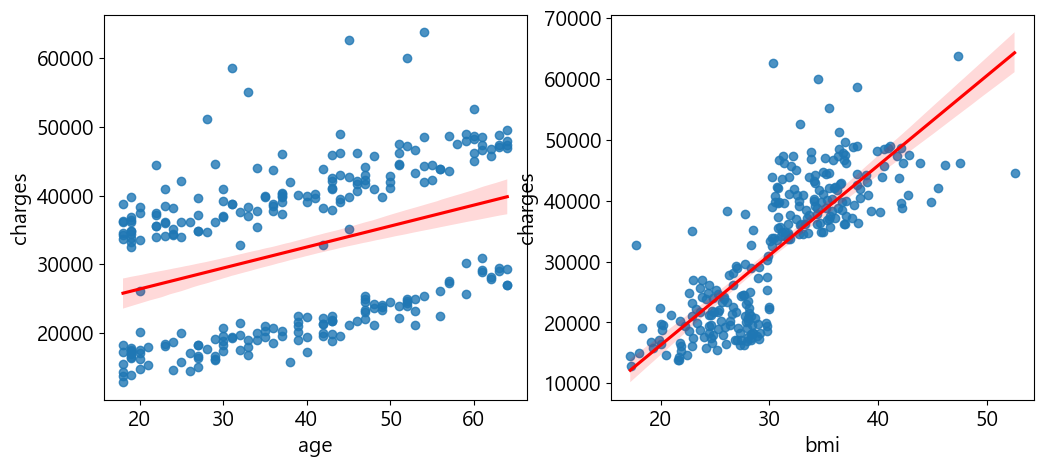

In [42]:
fig, (ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.regplot(x='age',y='charges',data = df_1,ax=ax1, line_kws={"color": "red"})
sns.regplot(x='bmi',y='charges',data = df_1,ax=ax2, line_kws={"color": "red"})

In [16]:
for_dic = {
    'age' : [10, 20, 30, 40, 50, 60],
    'sex' : [0, 1],
    'bmi' : [15, 20, 25, 30, 35, 40, 45],
    'children' : [0, 1, 2, 3, 4],
    'smoker' : [0, 1],
    'region' : [0, 1]
}

In [26]:
df_1

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
11,62,26.290,1,27808.72510
14,27,42.130,1,39611.75770
19,30,35.300,1,36837.46700
23,34,31.920,1,37701.87680
...,...,...,...,...
1313,19,34.700,1,36397.57600
1314,30,23.655,1,18765.87545
1321,62,26.695,1,28101.33305
1323,42,40.370,1,43896.37630


In [35]:
def regplot1(a):
    for_list = [a]
    df_test = df[:]
    df_test['bmi'] = df_test['bmi'] // 5 * 5
    df_test['age'] = df_test['age'] // 10 * 10
    for j in for_dic[for_list[0]]:
        df_1_1 = df_1.loc[df_test[for_list[0]] == j]
        fig, (ax1) = plt.subplots(ncols=1)
        fig.set_size_inches(12,5)
        plt.title(f'흡연자-{for_list[0]}-{j}')
        sns.regplot(x='age',y='charges',data = df_1_1,ax=ax1, line_kws={"color": "red"})
        plt.savefig(f'homework_img/흡연자-{for_list[0]}-{j}.png', dpi=100)

In [ ]:
regplot1('bmi')

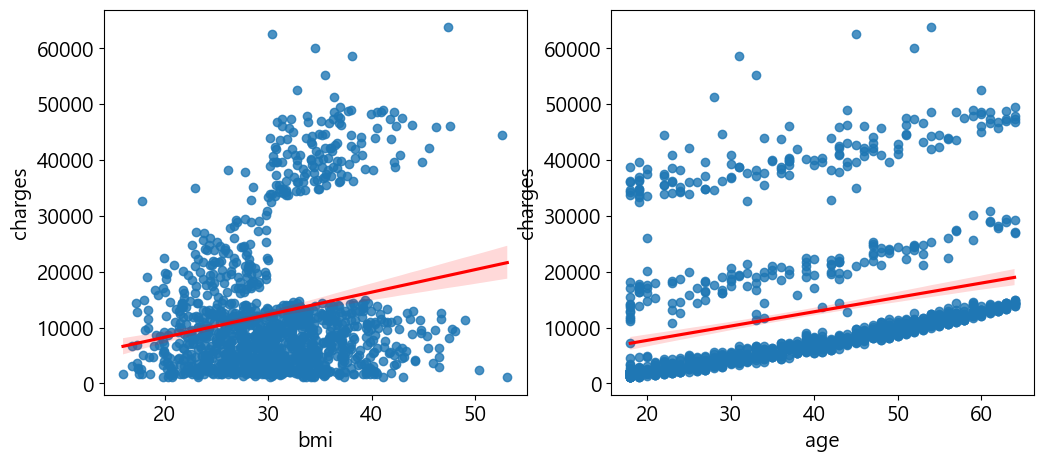

In [61]:
fig, (ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.regplot(x='bmi',y='charges',data = df,ax=ax1, line_kws={"color": "red"})
sns.regplot(x='age',y='charges',data = df,ax=ax2, line_kws={"color": "red"})
plt.savefig('homework_img/과제.png', dpi=100)